In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Local Error Dataset

In [2]:
casp_15_local_error = pd.read_csv('CASP15_Local_Error.csv')
casp_15_local_error = casp_15_local_error.sample(frac=1, random_state=42)
casp_15_local_error.reset_index(drop=True, inplace=True)
casp_15_local_error

,GDT_TS,GDT_HA,GDC_SC,rmsd
0,90.54,81.89,65.36,9.76
1,73.29,54.06,29.19,2.70
2,93.59,80.34,60.42,1.41
3,90.89,84.11,67.26,9.72
4,50.23,35.00,19.91,11.96
...,...,...,...,...
4865,95.59,89.36,73.70,1.24
4866,28.97,20.44,12.91,36.99
4867,96.38,91.63,77.25,1.22
4868,82.50,70.00,42.80,1.91


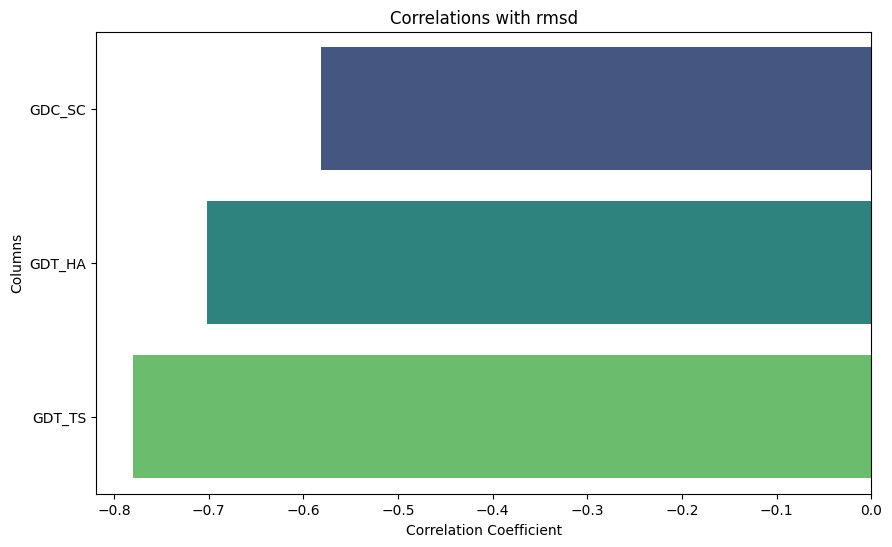

In [30]:
matrix = casp_15_local_error.corr()
target_value = 'rmsd'
correlations = casp_15_local_error.corr()[target_value].sort_values(ascending=False)
correlations = correlations.drop([target_value], axis =0)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title(f'Correlations with {target_value}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

In [37]:
casp_15_local_error.to_csv('CASP15_LOCAL_ERROR.csv',index =False)

# Global Error Dataset

In [109]:
casp_15_global_error = pd.read_csv('/Users/israelmason-williams/Downloads/CASP15_global_error.csv')                          

Removal of redundant columns and missing values - shuffeling of data points

In [110]:
casp_15_global_error = casp_15_global_error.dropna()
casp_15_global_error.sample(frac=1, random_state=42)

,GDT_TS,NP_P,AL0_P,AL4_P,Z-score,Z-Score,MP-Score,Global score,SG,AA,...,CoDM,DFM,Handed.,TM-score,TM-align,FlexE,ASE,reLLG lddt,reLLG const,DipDiff
1743,74.77,100.0,83.26,88.69,9.79,26.8,3.09,0.613,78.28,0.589,...,0.74,0.33,0.86,0.850,0.849,22.00,63.41,0.60,0.87,-0.163
2196,9.46,100.0,5.43,8.04,-0.03,4.8,3.73,0.251,15.54,0.382,...,0.29,1.78,0.49,0.188,0.298,120.27,38.18,0.00,0.00,-0.028
1728,77.04,100.0,81.45,89.59,9.86,27.8,2.98,0.662,73.53,0.635,...,0.90,0.29,0.91,0.859,0.864,8.01,67.37,0.55,1.39,-0.043
3337,80.42,100.0,80.00,91.67,5.76,6.2,1.43,0.786,100.00,0.786,...,0.99,0.04,0.92,0.709,0.709,0.27,70.75,0.45,0.41,-0.006
298,72.65,100.0,73.50,84.62,7.02,13.7,2.15,0.611,79.49,0.684,...,0.91,0.27,0.89,0.756,0.765,23.32,92.02,1.30,0.59,-0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,74.17,100.0,68.33,78.33,3.04,6.2,2.03,0.836,100.00,0.793,...,0.99,0.06,0.91,0.619,0.620,0.42,82.72,0.21,0.29,-0.188
466,94.66,100.0,96.58,97.44,8.37,22.8,1.12,0.851,97.01,0.826,...,0.98,0.07,0.96,0.944,0.944,20.39,92.88,17.52,15.17,0.016
3092,27.06,100.0,22.94,27.65,0.35,3.1,1.89,0.737,94.71,0.796,...,0.60,0.53,0.89,0.288,0.275,4.53,75.60,0.01,0.01,-0.007
3772,65.68,100.0,68.18,80.91,6.25,8.0,3.65,0.763,99.09,0.752,...,0.94,0.19,0.94,0.662,0.667,2.44,90.84,0.27,0.19,0.000


In [ ]:
casp_15_global_error = casp_15_global_error.drop(['Z-M1-GDT','BB error','SC error'],axis = 1) 
casp_15_global_error = casp_15_global_error.drop(['#','Model','GR#','GR Name','Charts'],axis=1)


# Getting the correlation values for GDT_TS 

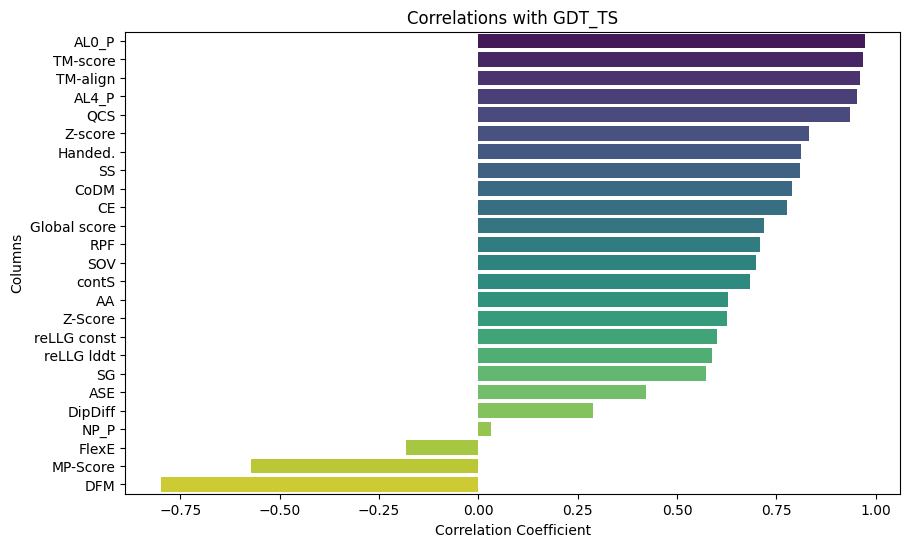

In [111]:
matrix = casp_15_global_error.corr()
target_value = 'GDT_TS'
correlations = casp_15_global_error.corr()[target_value].sort_values(ascending=False)
correlations = correlations.drop([target_value], axis =0)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title(f'Correlations with {target_value}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

In [112]:
correlations_abs = correlations.abs()
correlations_abs = correlations_abs.sort_values(ascending=False)[0:9]
correlations_abs = pd.DataFrame(correlations_abs)
columns_to_keep= ['AL0_P','TM-score','TM-align','AL4_P','QCS','Z-score','Handed.','SS','DFM',target_value]
reduced_global_df = casp_15_global_error[columns_to_keep]
reduced_global_df


,AL0_P,TM-score,TM-align,AL4_P,QCS,Z-score,Handed.,SS,DFM,GDT_TS
0,96.58,0.966,0.965,97.44,98.45,8.47,0.97,0.686,0.07,97.44
1,96.58,0.966,0.965,97.44,98.44,8.47,0.97,0.686,0.07,97.44
2,96.58,0.966,0.964,97.44,98.49,8.37,0.97,0.697,0.07,97.22
3,96.58,0.965,0.964,97.44,98.50,8.37,0.97,0.686,0.07,97.22
4,96.58,0.965,0.963,97.44,98.48,8.37,0.97,0.687,0.07,97.22
...,...,...,...,...,...,...,...,...,...,...
4195,0.00,0.097,0.140,0.00,5.92,-2.25,0.54,0.057,1.82,10.23
4196,0.00,0.099,0.112,0.00,5.61,-2.35,0.55,0.046,2.16,10.00
4197,0.00,0.099,0.112,0.00,5.61,-2.35,0.55,0.046,2.16,10.00
4198,0.00,0.096,0.105,0.91,5.64,-2.25,0.61,0.060,2.26,9.54


# Histogram of remaining columns

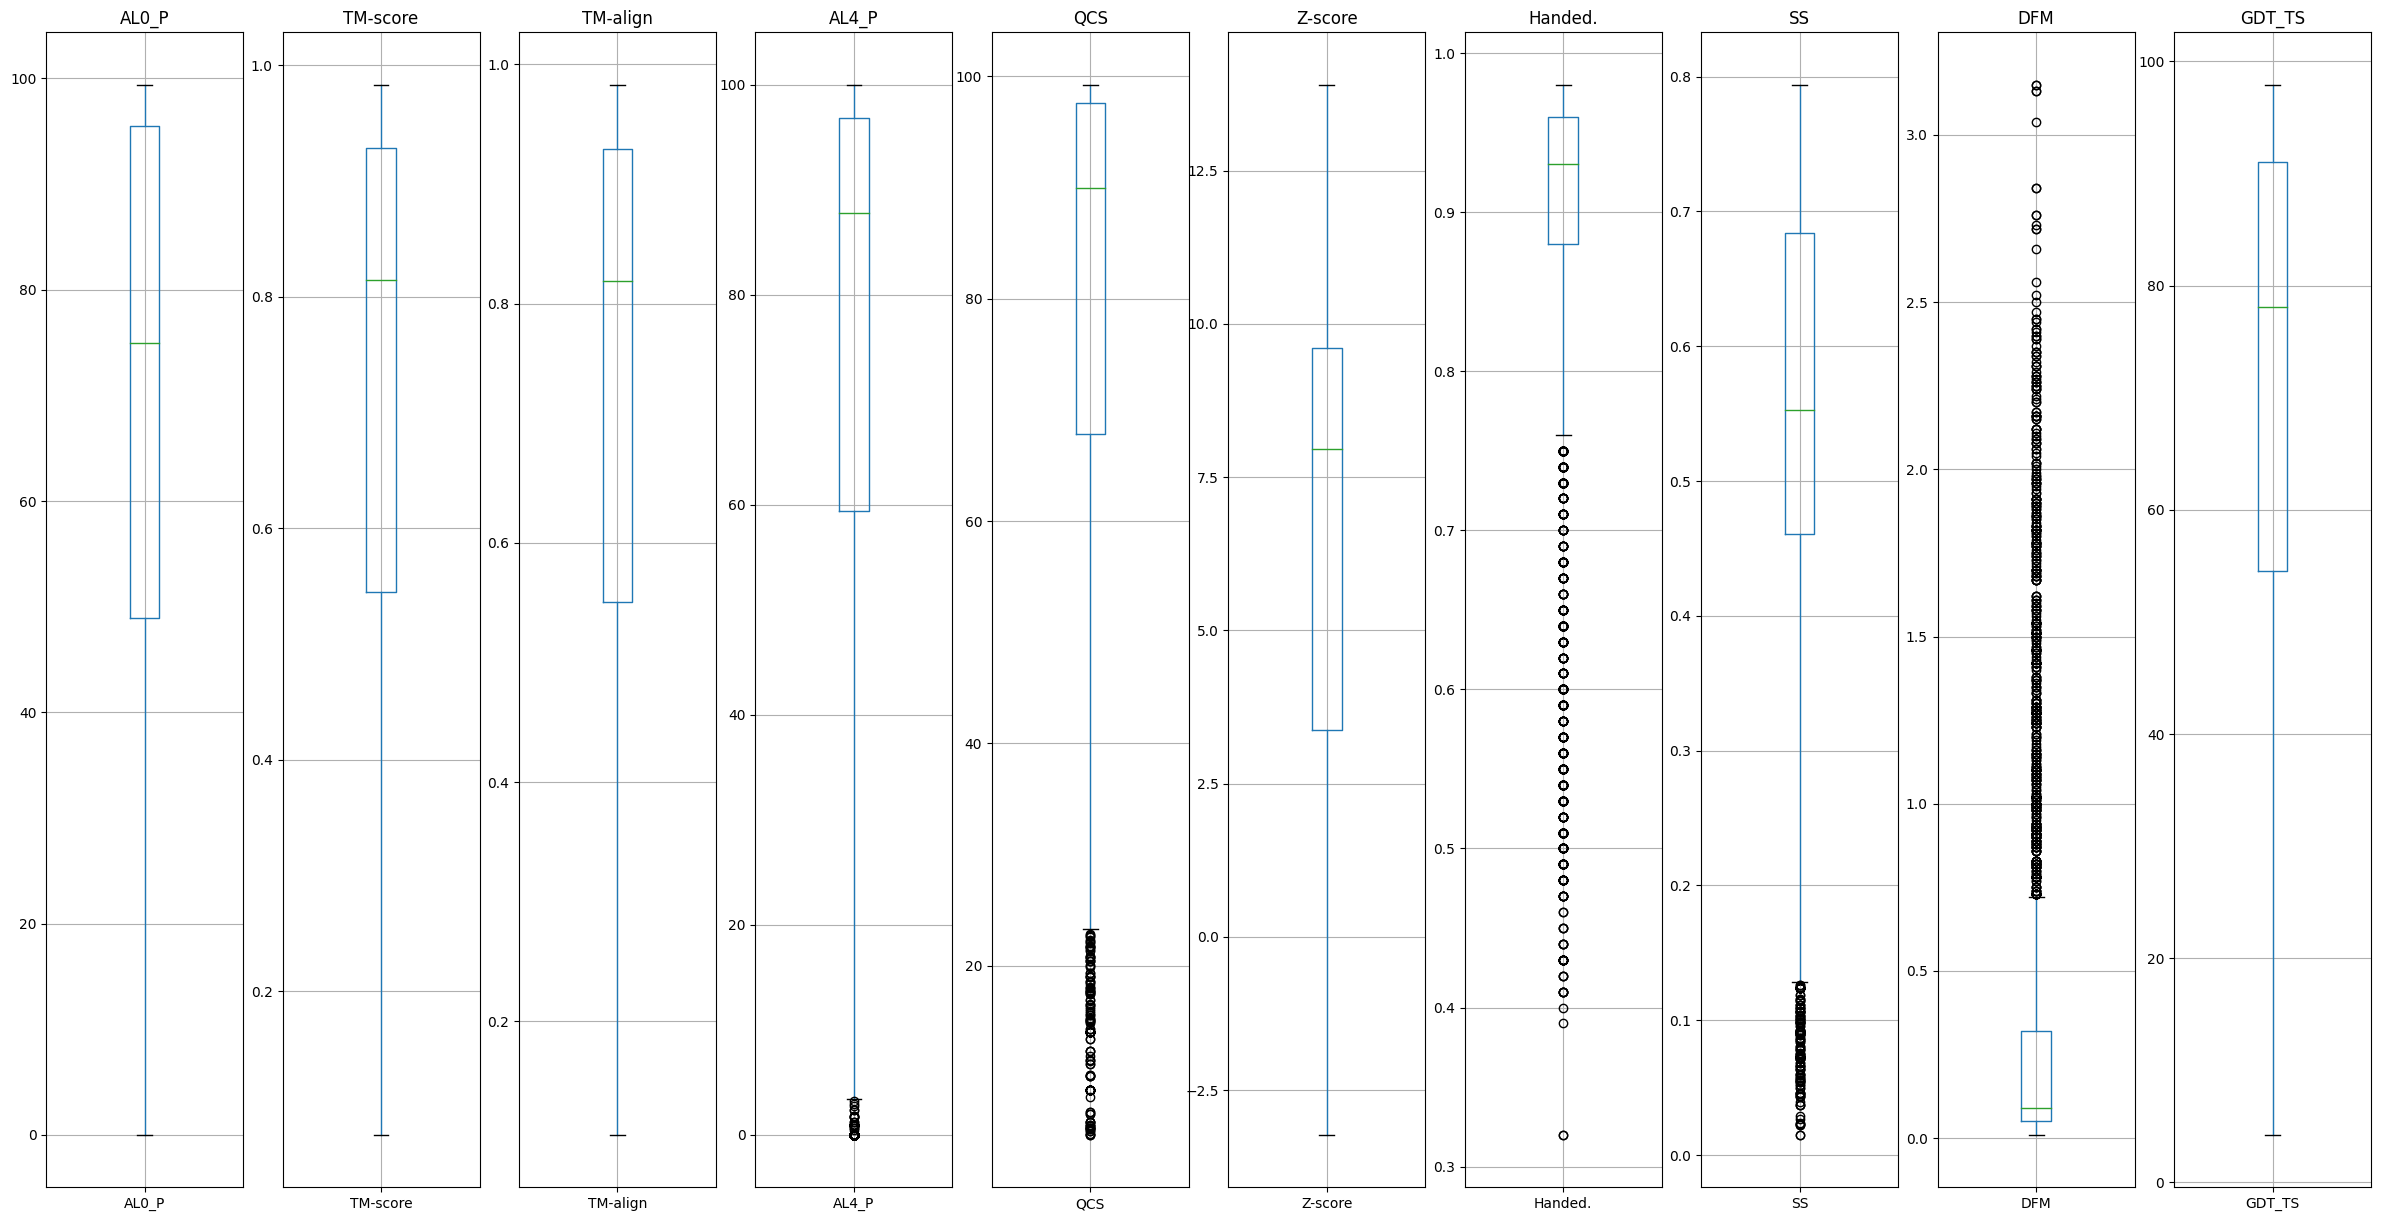

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=len(reduced_global_df.columns), figsize=(30, 15))

for i, column in enumerate(reduced_global_df.columns):
    reduced_global_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.show()

# Removal of outliers

In [114]:
column_means = reduced_global_df[columns_to_keep].mean()
column_std_devs = reduced_global_df[columns_to_keep].std()

threshold_std = 3
outliers = ((reduced_global_df[columns_to_keep] - column_means).abs() > threshold_std * column_std_devs)

cleaned_reduced_global_df = reduced_global_df[~outliers.any(axis=1)]

cleaned_reduced_global_df

,AL0_P,TM-score,TM-align,AL4_P,QCS,Z-score,Handed.,SS,DFM,GDT_TS
0,96.58,0.966,0.965,97.44,98.45,8.47,0.97,0.686,0.07,97.44
1,96.58,0.966,0.965,97.44,98.44,8.47,0.97,0.686,0.07,97.44
2,96.58,0.966,0.964,97.44,98.49,8.37,0.97,0.697,0.07,97.22
3,96.58,0.965,0.964,97.44,98.50,8.37,0.97,0.686,0.07,97.22
4,96.58,0.965,0.963,97.44,98.48,8.37,0.97,0.687,0.07,97.22
...,...,...,...,...,...,...,...,...,...,...
4187,0.00,0.121,0.178,0.00,8.79,-2.35,0.60,0.073,1.02,10.91
4188,0.00,0.121,0.178,0.00,8.79,-2.35,0.60,0.073,1.02,10.91
4189,0.00,0.121,0.178,0.00,8.79,-2.35,0.60,0.073,1.02,10.91
4190,0.00,0.121,0.178,0.00,8.79,-2.35,0.60,0.073,1.02,10.91


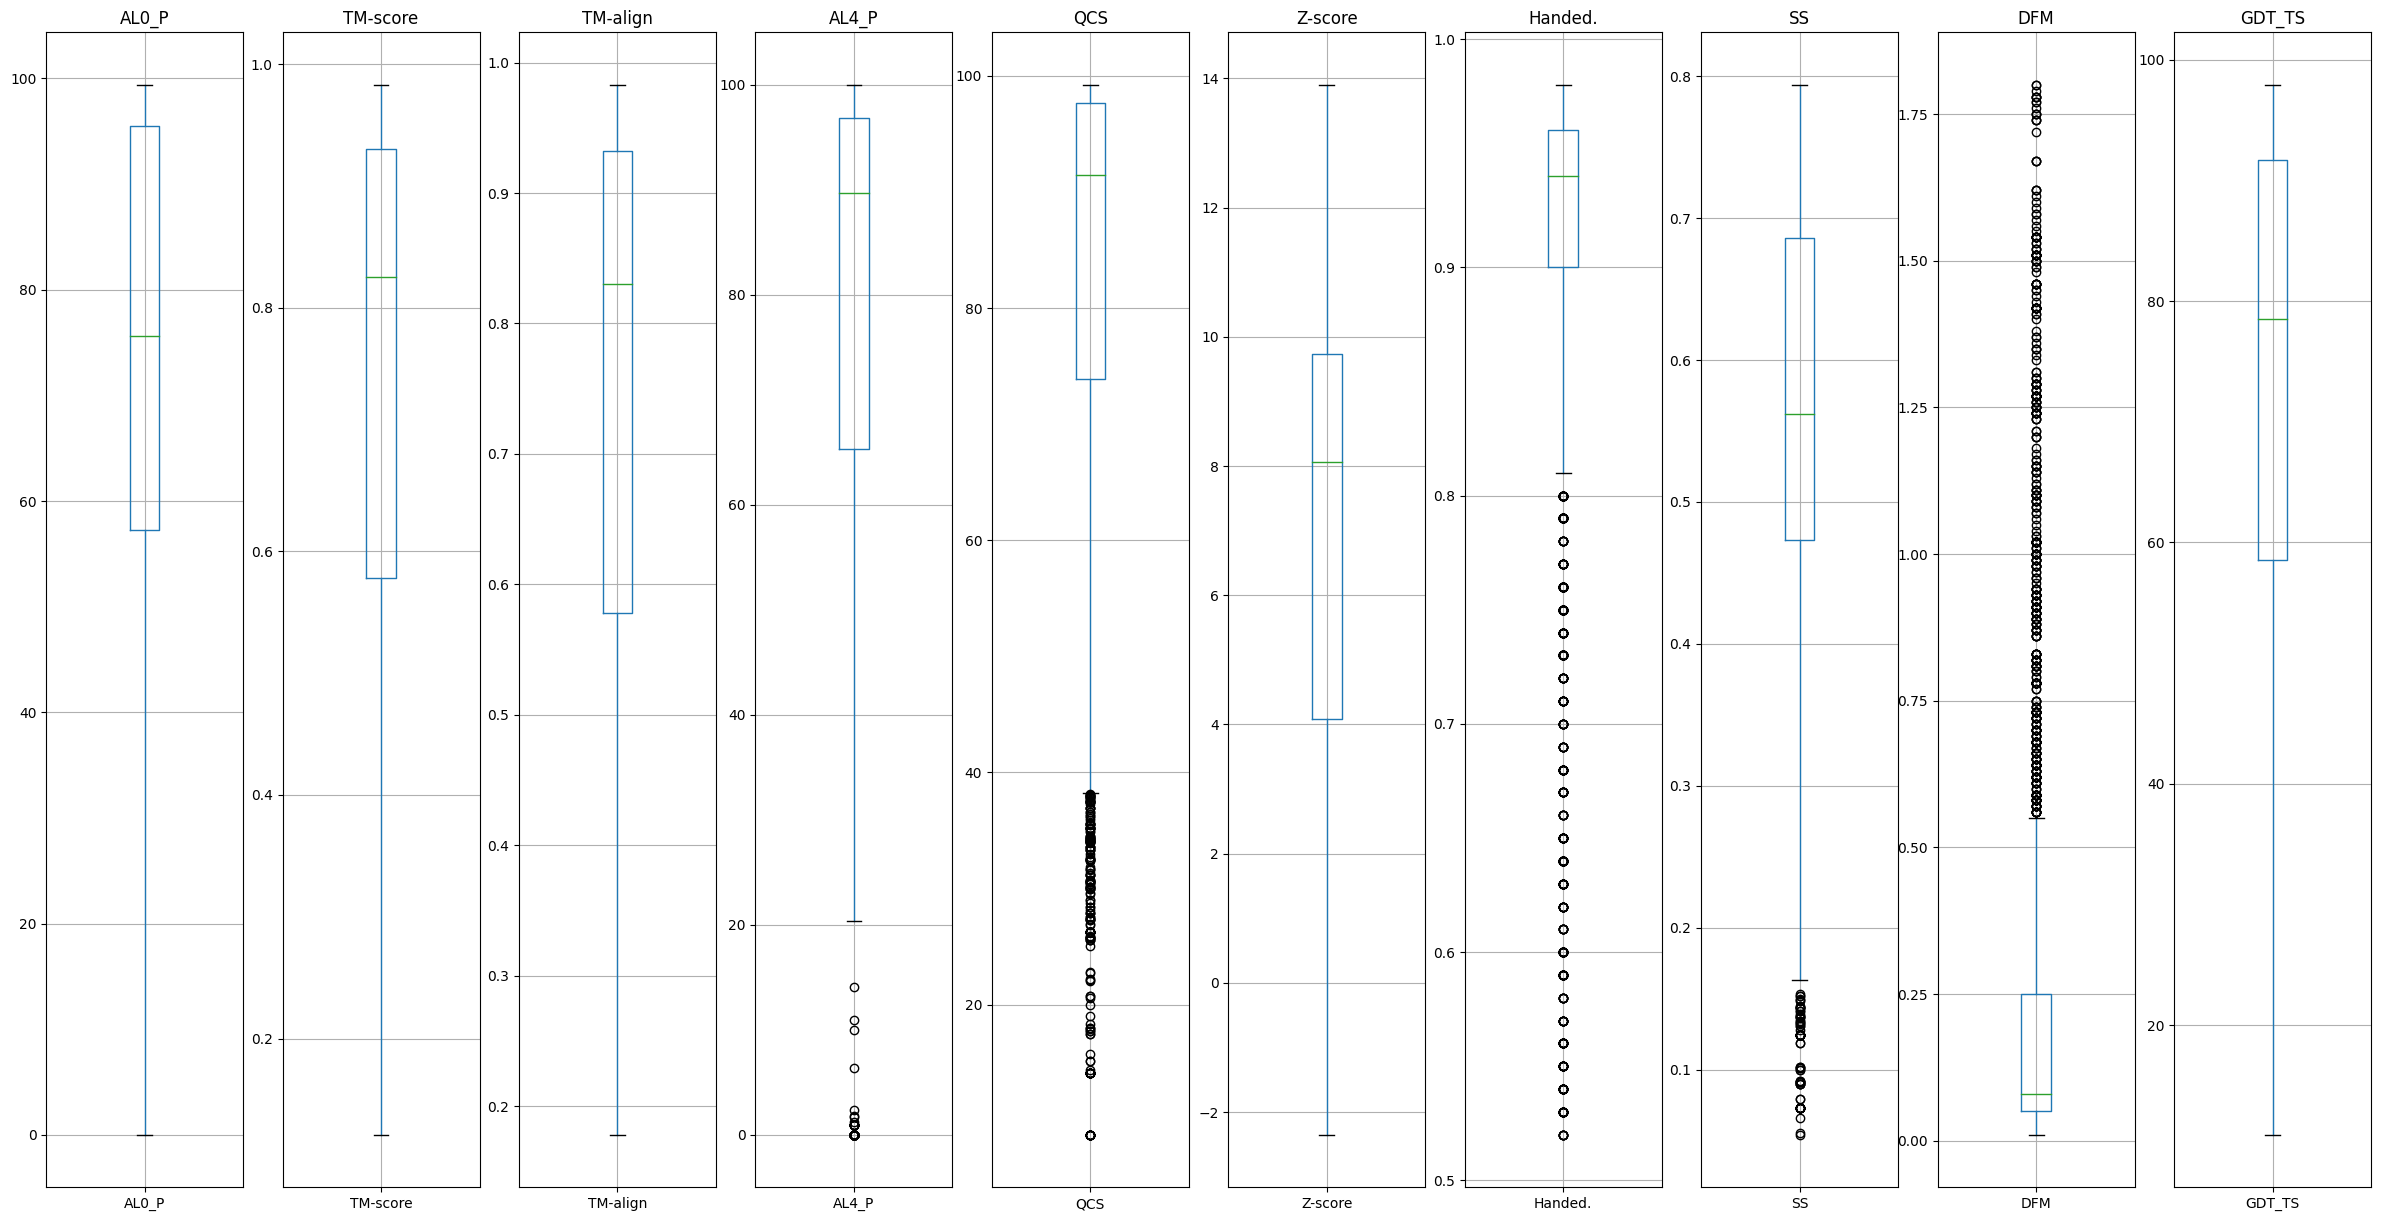

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=len(cleaned_reduced_global_df.columns), figsize=(30, 15))

for i, column in enumerate(cleaned_reduced_global_df.columns):
    cleaned_reduced_global_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.show()

Saving resulting dataframe

In [116]:
cleaned_reduced_global_df.to_csv('CASP15_GLOBAL_ERROR.csv',index = False)